In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport

data = pd.read_csv('../input/malnutrition-across-the-globe/malnutrition-estimates.csv')
data_by_country = pd.read_csv('../input/malnutrition-across-the-globe/country-wise-average.csv')
data.drop(['Unnamed: 0','ISO code'], axis=1, inplace=True)

# Malnutrition

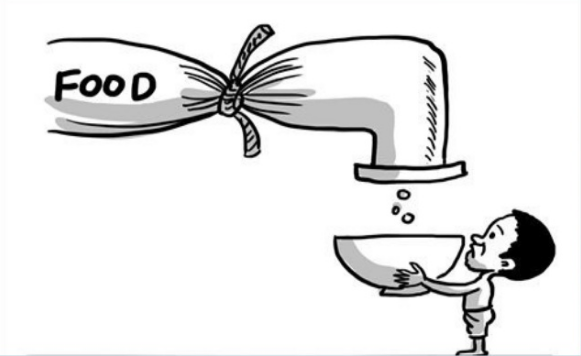

In [2]:
from IPython.display import Image
Image("../input/nifty50/Capture.PNG")
#source: https://www.slideshare.net/souravgoswami11/epidemiology-of-childhood-malnutrition-in-india-and-strategies-of-control

Malnutrition is a condition that results from eating a diet in which one or more nutrients are either not enough or are too much such that the diet causes health problems. It may involve calories, protein, carbohydrates, fat, vitamins or minerals. Not enough nutrients is called undernutrition or undernourishment while too much is called overnutrition. 

Malnutrition is often used to specifically refer to undernutrition where an individual is not getting enough calories, protein, or micronutrients. If undernutrition occurs during pregnancy, or before two years of age, it may result in permanent problems with physical and mental development. Extreme undernourishment, known as starvation, may have symptoms that include: a short height, thin body, very poor energy levels, and swollen legs and abdomen. 

People also often get infections and are frequently cold. The symptoms of micronutrient deficiencies depend on the micronutrient that is lacking. [Source](https://en.wikipedia.org/wiki/Malnutrition).

# Report of Malnutrition Data

In [3]:
report = ProfileReport(data)

In [4]:
report

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# Which country shows highest Underweight percentage? ---> Bangladesh

In [5]:
country = data.loc[:,['Country','Underweight']]
country['percunder'] = country.groupby('Country')['Underweight'].transform('max')
country = country.drop('Underweight',axis=1).drop_duplicates().sort_values('percunder', ascending=False).head()

fig = px.pie(country, names='Country', values='percunder', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label")
fig.show()